In [1]:
# initial settings
#Note the installation of the forecast packages takes a while
libary_path <- paste(getwd(), "packages",sep="/")
dir.create(libary_path,showWarnings = FALSE)
.libPaths(libary_path)

if(!require(tidyverse)){
    install.packages("tidyverse")
    library(tidyverse)
}
if(!require(repr)){
    install.packages("repr")
    library(repr)
}
if(!require(lubridate)){
    install.packages("lubridate")
    library(lubridate)
}
if(!require(janitor)){
    install.packages("janitor")
    library(janitor)
}
if(!require(dplyr)){
    install.packages("dplyr")
    library(dplyr)
}



# Plot size deppening on your screen resolution to 4 x 4
options(repr.plot.width=6, repr.plot.height=6)


Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: repr

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: janitor


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Welcome to Day 3 ML Workshop


### Exercise 1: PCA clustering in simulated data


In this exercise, you will generate simulated data, and then perform PCA and K-means clustering on the data. Firstly, generate a simulated data set with 20 observations in each of three classes (i.e., 60 observations in total), and 50 variables. There are a number of functions in R that you can use to generate data. One example is the <font color="blue">rnorm()</font> function; <font color="blue">runif()</font> is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

##### (a) Simulating data

In [2]:
### BEGIN SOLUTION

# (part a): generating 3 simulated data
set.seed(3)
n = 20 # the number of samples per class
p = 50 # the number of variables 
# Create data for class 1: 
X_1 = matrix( rnorm(n*p), nrow=n, ncol=p )
for( row in 1:n ){
  X_1[row,] = X_1[row,] + rep( 1, p ) 
}
# Create data for class 2: 
X_2 = matrix( rnorm(n*p), nrow=n, ncol=p )
for( row in 1:n ){
  X_2[row,] = X_2[row,] + rep( -1, p ) 
}
# Create data for class 3:
X_3 = matrix( rnorm(n*p), nrow=n, ncol=p )
for( row in 1:n ){
  X_3[row,] = X_3[row,] + c( rep( +1, p/2 ), rep( -1, p/2 ) ) 
}
X = rbind( X_1, X_2, X_3 )
labels = c( rep(1,n), rep(2,n), rep(3,n))

### END SOLUTION

##### (b) Running the PCA.
In this exercise, you will perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

The `prcomp` function returns an object of class `prcomp`, which have some methods available. The print method returns the standard deviation of each of the PCs, and their loadings, which are the coefficients of the linear combinations of the variables.

In [3]:
### BEGIN SOLUTION

# running the pca
pca.out = prcomp(X, center = TRUE, scale. = TRUE) # when running the pca, always activate the argument scale=TRUE to normalise the data
print(pca.out)

### END SOLUTION

Standard deviations (1, .., p=50):
 [1] 4.33502890 2.59514277 1.30024697 1.26057788 1.19603580 1.17248229
 [7] 1.10266405 1.05552583 1.04027515 1.01931856 1.00762718 0.98354299
[13] 0.95627298 0.93894679 0.90331237 0.87709115 0.85889367 0.82959289
[19] 0.80109984 0.76078811 0.73172281 0.71007580 0.69811550 0.68310501
[25] 0.64600296 0.63903298 0.59052766 0.57505517 0.53186358 0.50490185
[31] 0.46896003 0.46511752 0.44535289 0.42391465 0.38257680 0.36607814
[37] 0.34619201 0.33006358 0.31018482 0.29307810 0.28207284 0.25501574
[43] 0.24484974 0.21568312 0.19359026 0.17562939 0.15567346 0.14423331
[49] 0.11217363 0.08397205

Rotation (n x k) = (50 x 50):
             PC1         PC2          PC3         PC4          PC5          PC6
 [1,] 0.14304575  0.15926940  0.056105247 -0.17021551  0.090392552 -0.163571714
 [2,] 0.12658966  0.13231809 -0.202908312  0.02883118  0.264129101 -0.085498929
 [3,] 0.10190969  0.12703131  0.152629413  0.35893330  0.094434065 -0.010357768
 [4,] 0.16542900  0

Since scale (i.e., skewness and the magnitude) of the variables influence the resulting PCs, it is good practice to apply variable standardization, center and scale the variables prior to the application of PCA.

The <font color="blue">plot</font> method returns a plot of the variances (y-axis) associated with the PCs (x-axis). The Figure below is useful to decide how many PCs to retain for further analysis. It shows that the first 2 PCs explain most of the variability in the data

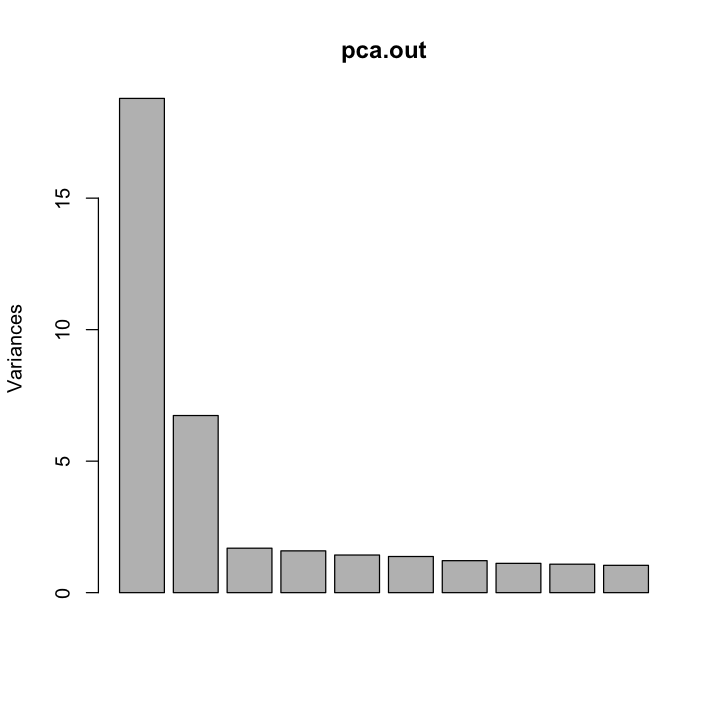

In [4]:
# plotting the distribution of the PC's 
plot(pca.out)

The `summary` method describe the importance of the PCs. The first row describe again the standard deviation associated with each PC. The second row shows the proportion of the variance in the data explained by each component while the third row describe the cumulative proportion of explained variance.

In [5]:
# displaying the summary results of my PCA analysis
summary(pca.out)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     4.3350 2.5951 1.30025 1.26058 1.19604 1.17248 1.10266
Proportion of Variance 0.3759 0.1347 0.03381 0.03178 0.02861 0.02749 0.02432
Cumulative Proportion  0.3759 0.5105 0.54436 0.57614 0.60475 0.63224 0.65656
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.05553 1.04028 1.01932 1.00763 0.98354 0.95627 0.93895
Proportion of Variance 0.02228 0.02164 0.02078 0.02031 0.01935 0.01829 0.01763
Cumulative Proportion  0.67884 0.70049 0.72127 0.74157 0.76092 0.77921 0.79684
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.90331 0.87709 0.85889 0.82959 0.80110 0.76079 0.73172
Proportion of Variance 0.01632 0.01539 0.01475 0.01376 0.01284 0.01158 0.01071
Cumulative Proportion  0.81316 0.82855 0.84330 0.85707 0.86990 0.88148 0.89219
                          PC22    

Now, let's plot 2 PC's:

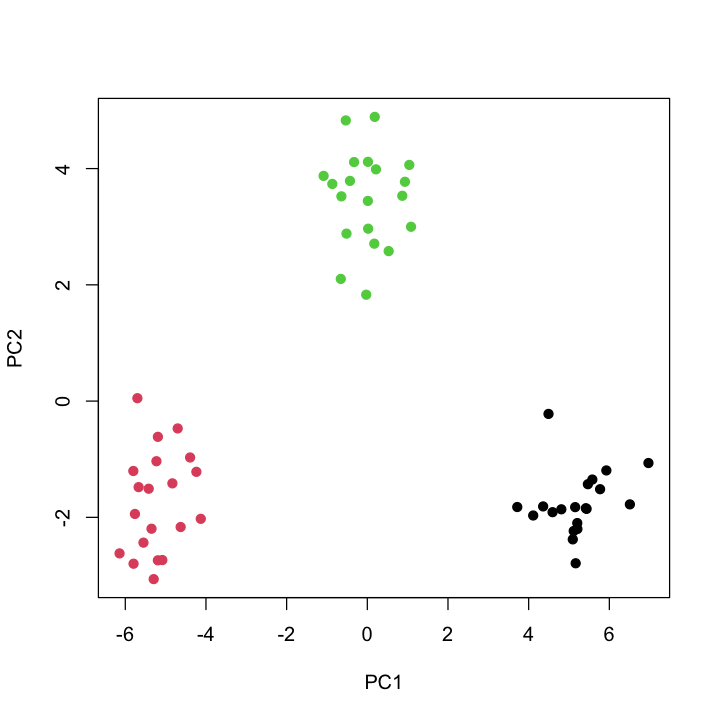

In [6]:
### BEGIN SOLUTION

plot(pca.out$x[,1:2], col=labels, xlab="PC1", ylab="PC2", pch=19) # the variable to be used to colour should be numeric or facto

### END SOLUTION

The plot shows that the three classes appear well separated. We can move to the next exercise.

### Exercise 2: Perform K-means clustering the result of your PCA with K = 3.

How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the <font color="blue">table()</font> function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [7]:
### BEGIN SOLUTION
set.seed(1)
kmean.out = kmeans( X, centers=3, nstart=50 )
table(kmean.out$cluster, labels )

### END SOLUTION

   labels
     1  2  3
  1  0  0 20
  2 20  0  0
  3  0 20  0

The table shows that the k-mean clustering algorithm has successfully identified the three class.

In [8]:
# checking the clusters modelled
kmean.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Perform K-means clustering with K = 4, and describe your results.

In [9]:
kmean.out.4 = kmeans( X, centers=4, nstart=50 )
kmean.out.4$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[39] 4 4 1 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 2 1

The output clearly indicates that points in one class has been split into two clusters.

#### Now perform K-means clustering with K = 3 on the first two principal component score vectors.
In this exercise, instead of running <a><font color="blue">kmeans</font></a> on the raw data, you will perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [10]:
# perfoming the knn in the clusters built by PCA
kmean.out.pca = kmeans(pca.out$x[,1:2], centers=3, nstart=50 )
kmean.out.pca$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [11]:
# print the clustering produced by k-means compared with the ones produced by PCA 
table(kmean.out.pca$cluster,labels)

   labels
     1  2  3
  1  0  0 20
  2 20  0  0
  3  0 20  0

The outputs above show a perfect match between clusters and classes.

### Exercise 3: Running PCA in real data (`wine.csv`)

In [12]:
# loading the data
wine.df <- read.csv("wine.csv")
head(wine.df)

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,A,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [13]:
# checking types of wine
unique(wine.df$Type)

[1] "A" "B" "C"

In [14]:
# pca without scale 
options(scipen = 999, digits = 2) # to avoid scientific notaiton
pcs.cor <- prcomp(wine.df[,-1])
summary(pcs.cor)

Importance of components:
                           PC1      PC2     PC3     PC4     PC5     PC6   PC7
Standard deviation     314.963 13.13527 3.07215 2.23409 1.10853 0.91710 0.528
Proportion of Variance   0.998  0.00174 0.00009 0.00005 0.00001 0.00001 0.000
Cumulative Proportion    0.998  0.99983 0.99992 0.99997 0.99998 0.99999 1.000
                         PC8   PC9  PC10  PC11  PC12   PC13
Standard deviation     0.389 0.335 0.268 0.194 0.145 0.0906
Proportion of Variance 0.000 0.000 0.000 0.000 0.000 0.0000
Cumulative Proportion  1.000 1.000 1.000 1.000 1.000 1.0000

PC1 has a very high proportion of the variance because it is composed mostly of  proline, which has a much larger scale than the other variables. Thus the necessity to scale variable to run the PCA properly.

In [15]:
# pca with scale 
options(scipen = 999, digits = 2) # to avoid scientific notaiton
pcs.cor <- prcomp(wine.df[,-1], scale. = TRUE)
summary(pcs.cor)

Importance of components:
                         PC1   PC2   PC3    PC4    PC5    PC6    PC7    PC8
Standard deviation     2.169 1.580 1.203 0.9586 0.9237 0.8010 0.7423 0.5903
Proportion of Variance 0.362 0.192 0.111 0.0707 0.0656 0.0494 0.0424 0.0268
Cumulative Proportion  0.362 0.554 0.665 0.7360 0.8016 0.8510 0.8934 0.9202
                          PC9   PC10   PC11  PC12    PC13
Standard deviation     0.5375 0.5009 0.4752 0.411 0.32152
Proportion of Variance 0.0222 0.0193 0.0174 0.013 0.00795
Cumulative Proportion  0.9424 0.9617 0.9791 0.992 1.00000

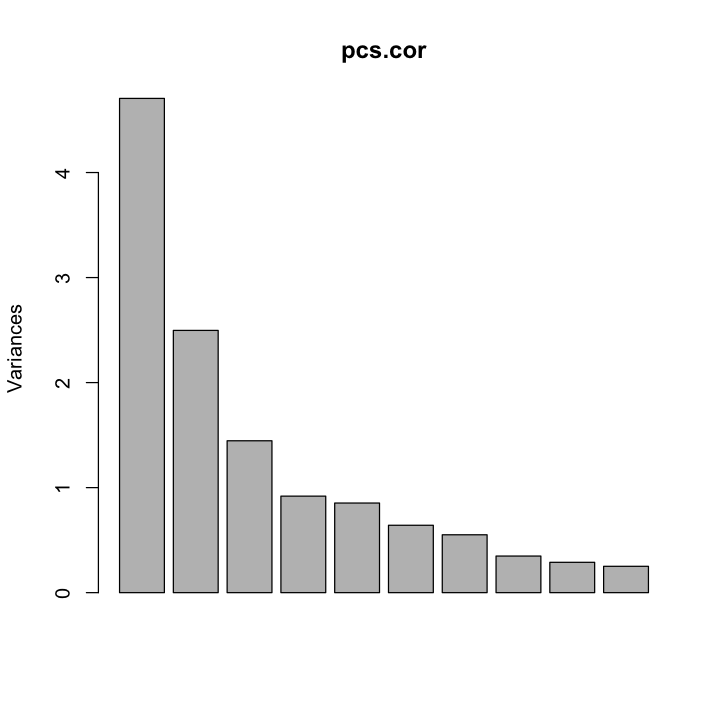

In [16]:
# plotting the distribution of the PC's 
plot(pcs.cor)

Let's plot, like we did for the simulated data case, the PC1 and PC2, and colouring the points by some categorical variable in the `wine.csv` dataset, to see how the PCA clustered this dataset. This categorical variable might be `type`.

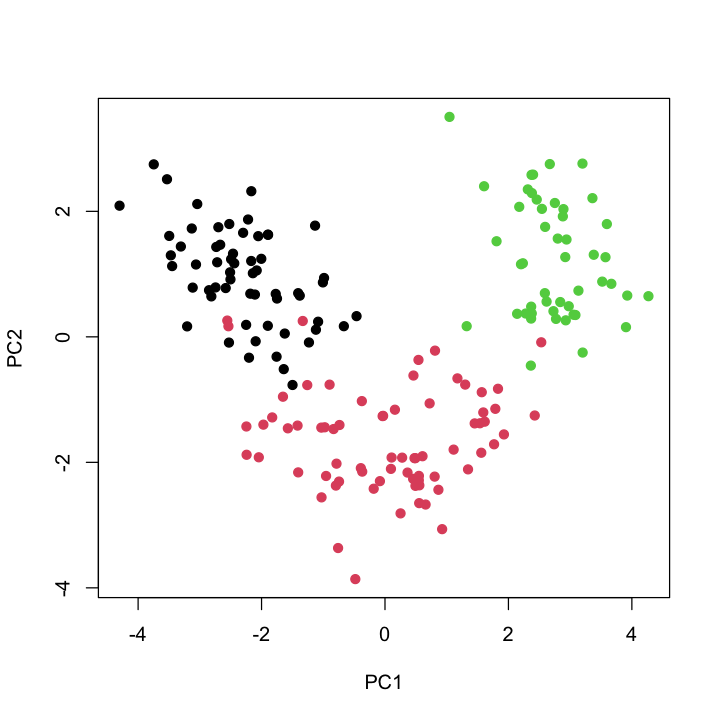

In [17]:
# plotting the clusters according the PC1 and PC2 
plot(pcs.cor$x[,1:2], col=as.factor(wine.df$Type), xlab="PC1", ylab="PC2", pch=19)